# EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('engineered_lending_club_data.csv')

C:\Users\91703\AppData\Local\Temp\ipykernel_1724\3790153630.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('engineered_lending_club_data.csv')


In [3]:
data.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_title,emp_length,home_ownership,...,purpose_grouped_debt_consolidation,purpose_grouped_home_improvement,purpose_grouped_house,purpose_grouped_major_purchase,purpose_grouped_medical,purpose_grouped_moving,purpose_grouped_other,purpose_grouped_small_business,purpose_grouped_vacation,risk_level
0,39651438,0.797468,32000.0,32000.0,60 months,0.201713,687.65,Public Service,10+ years,MORTGAGE,...,True,False,False,False,False,False,False,False,False,Low Risk
1,16411620,0.230380,9600.0,9600.0,36 months,0.299065,323.42,Teacher,10+ years,RENT,...,True,False,False,False,False,False,False,False,False,Low Risk
2,45122316,0.088608,4000.0,4000.0,36 months,0.053349,122.93,System Analyst,4 years,MORTGAGE,...,False,False,False,True,False,False,False,False,False,Low Risk
3,125356772,0.139873,6025.0,6025.0,36 months,0.218069,197.00,Admin assistant,10+ years,RENT,...,True,False,False,False,False,False,False,False,False,Low Risk
4,128490686,0.620253,25000.0,25000.0,60 months,0.817368,752.96,Coordinator,10+ years,OWN,...,True,False,False,False,False,False,False,False,False,Low Risk


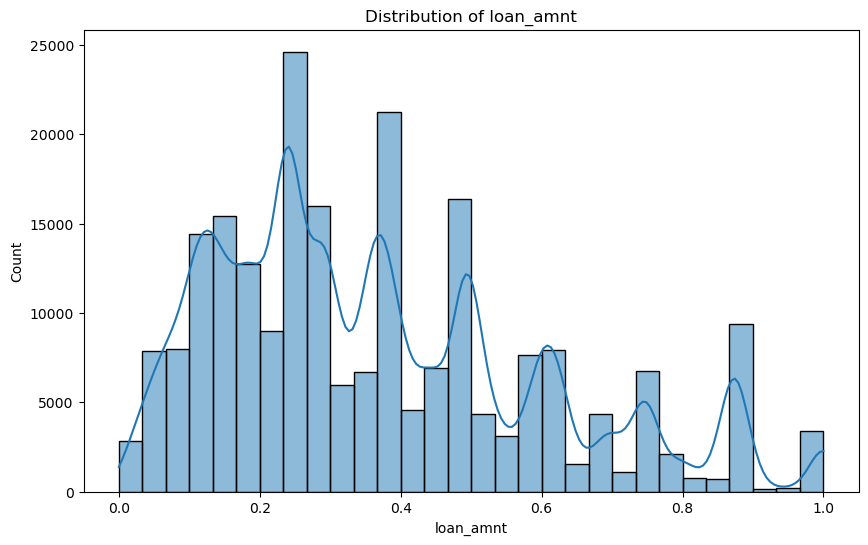

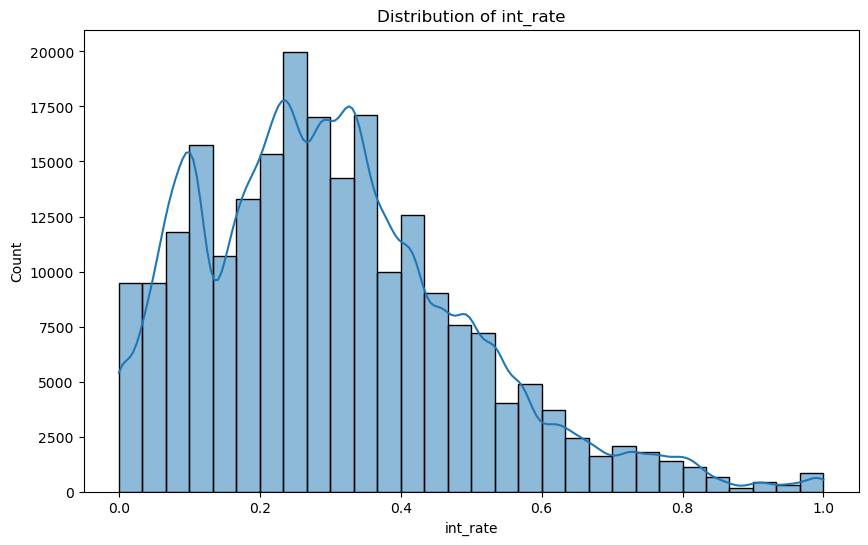

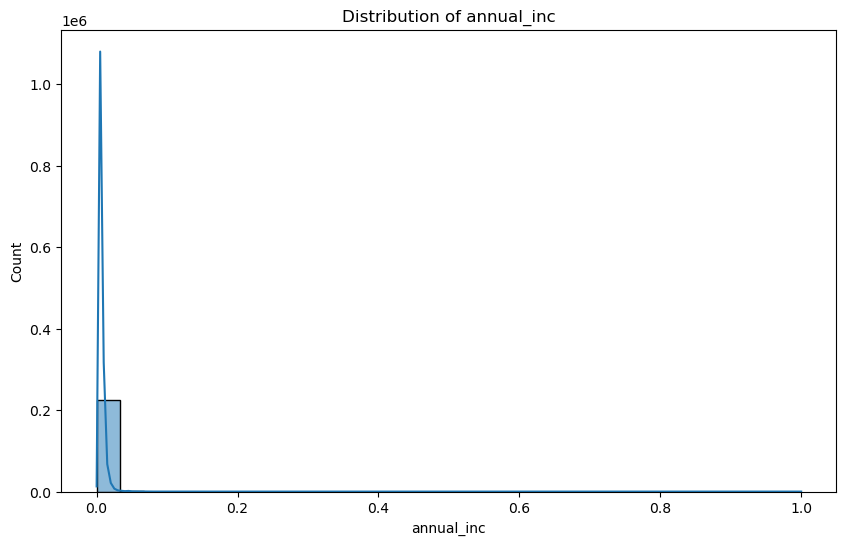

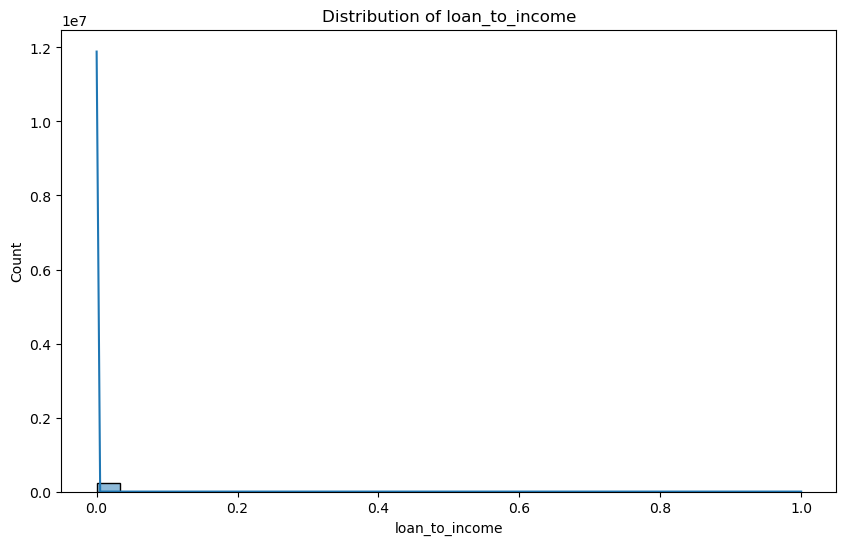

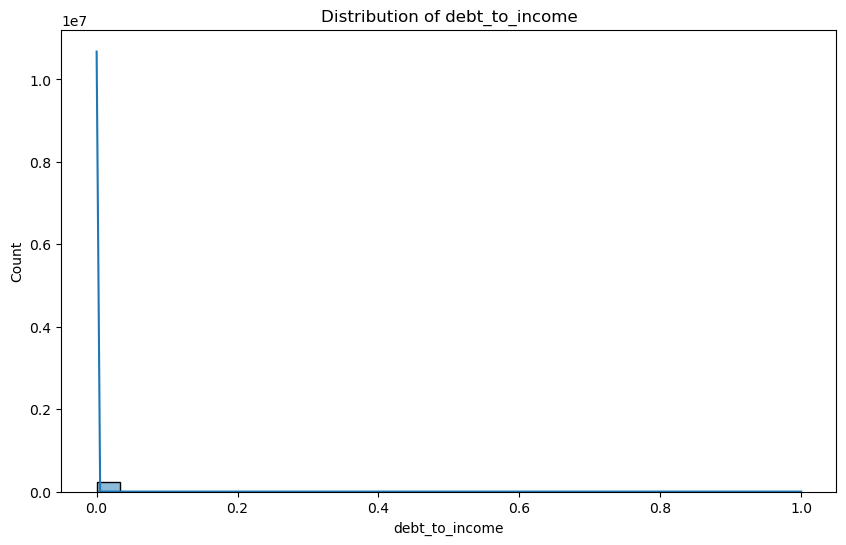

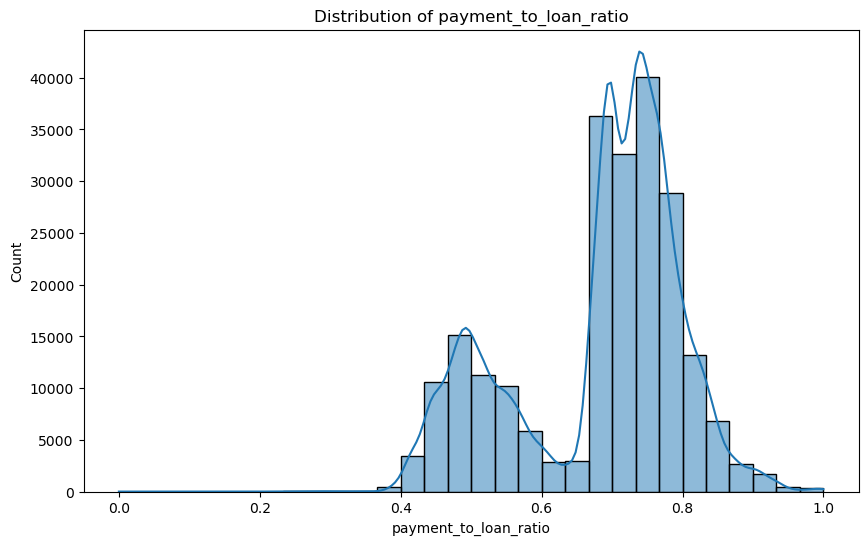

In [4]:
# List of numerical columns to plot
numerical_cols = ['loan_amnt', 'int_rate', 'annual_inc', 'loan_to_income', 'debt_to_income', 'payment_to_loan_ratio']

for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


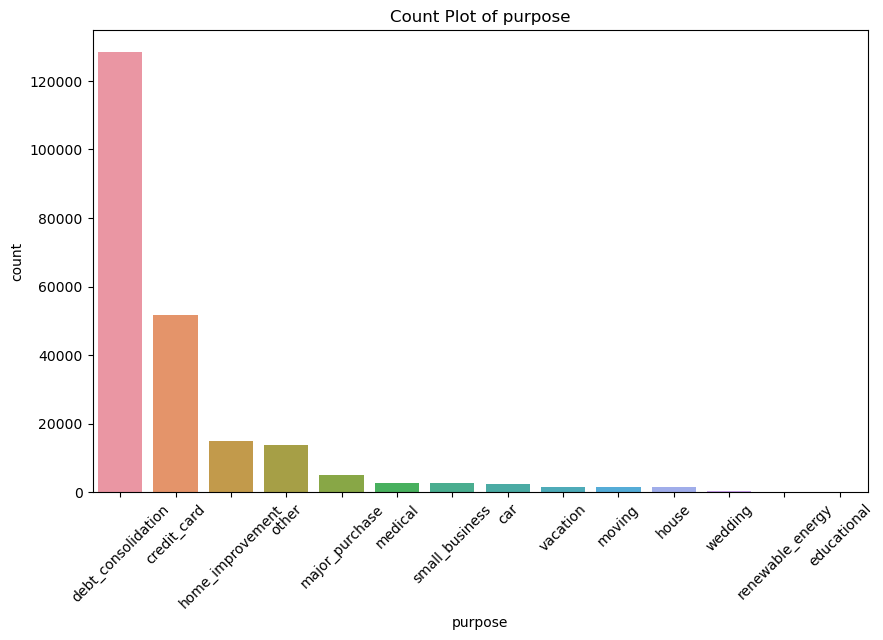

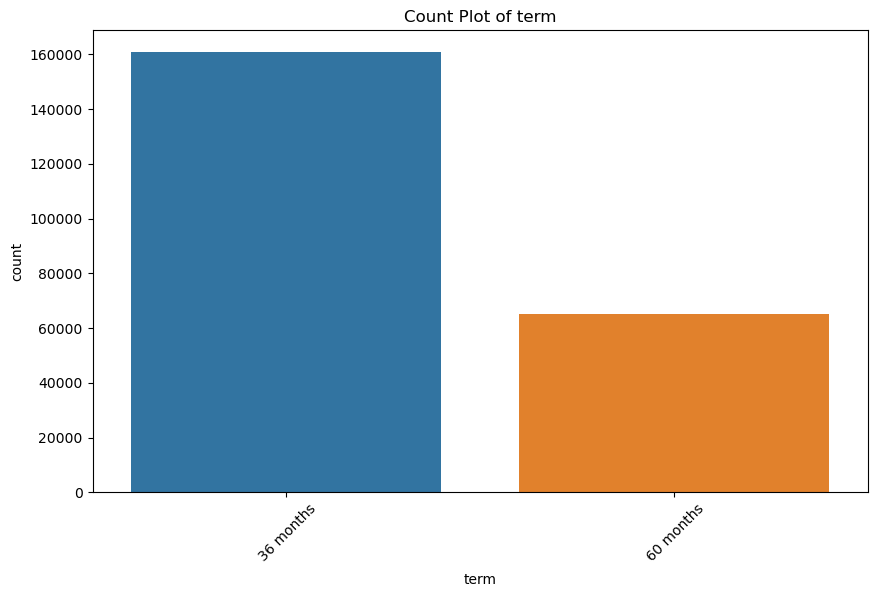

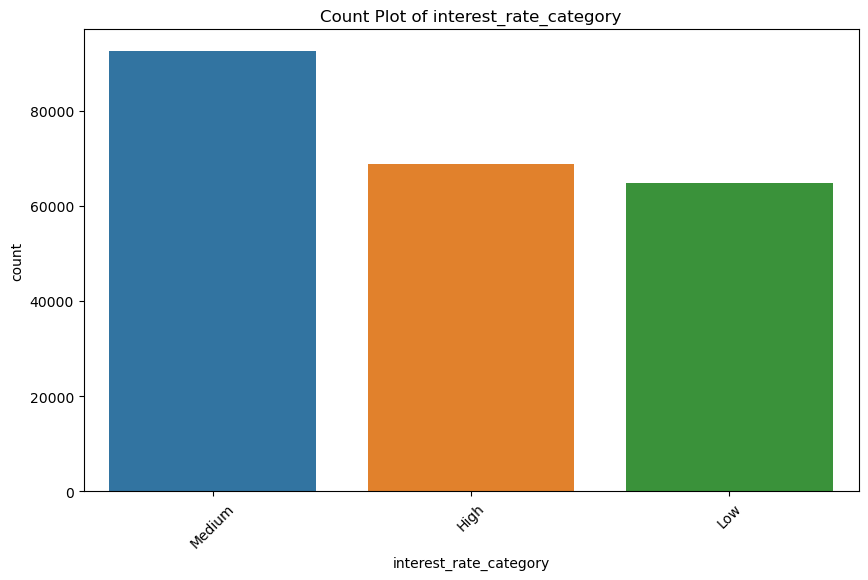

In [5]:
categorical_cols = ['purpose', 'term', 'interest_rate_category']

for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=data, order=data[col].value_counts().index)
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)
    plt.show()


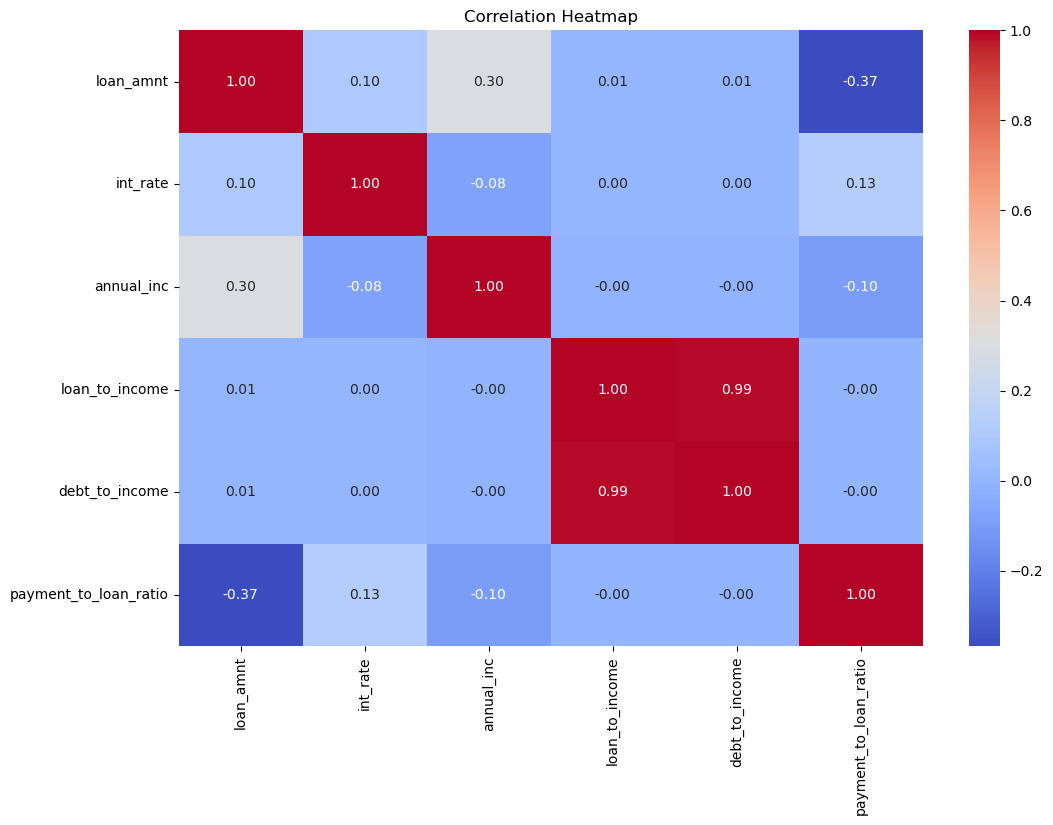

In [6]:
plt.figure(figsize=(12, 8))
correlation_matrix = data[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


C:\Users\91703\AppData\Local\Temp\ipykernel_1724\3444962697.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='purpose', y='loan_amnt', data=data, ci=None, order=data['purpose'].value_counts().index)


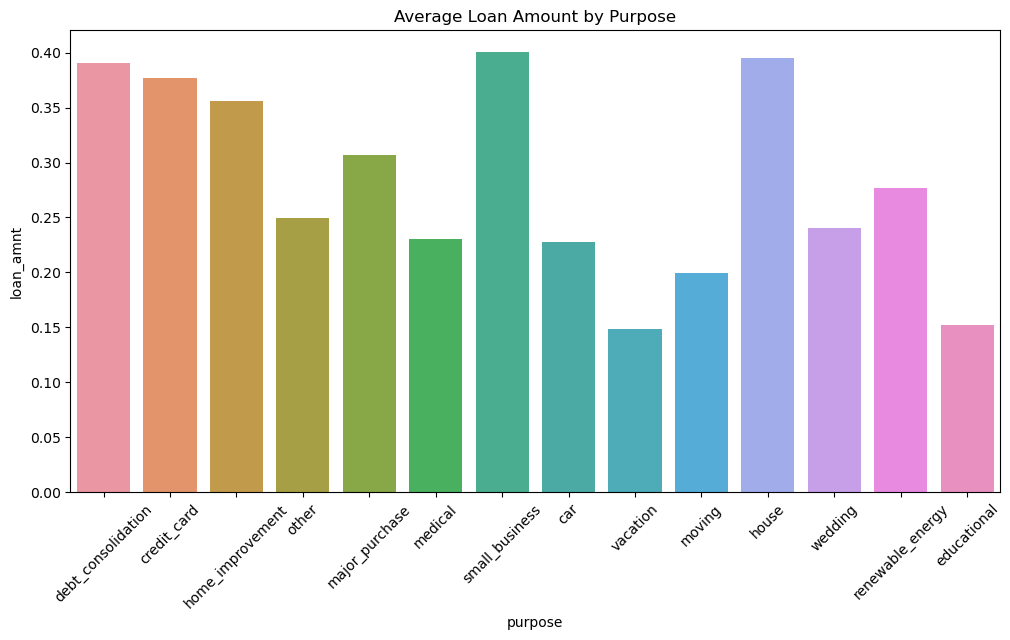

In [7]:
plt.figure(figsize=(12, 6))
sns.barplot(x='purpose', y='loan_amnt', data=data, ci=None, order=data['purpose'].value_counts().index)
plt.title('Average Loan Amount by Purpose')
plt.xticks(rotation=45)
plt.show()


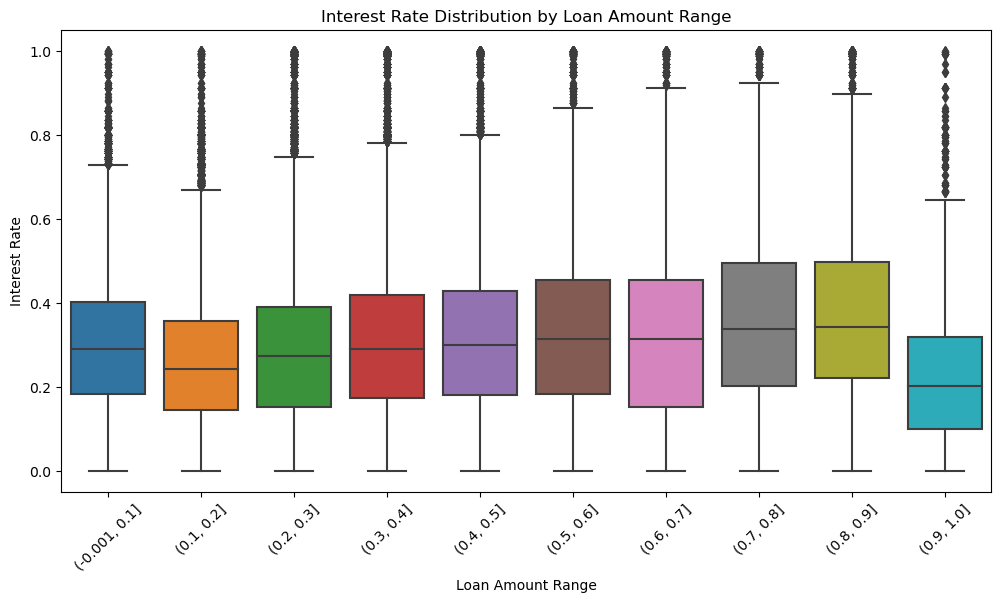

In [8]:
# Create bins for loan amounts
data['loan_amnt_bins'] = pd.cut(data['loan_amnt'], bins=10)

plt.figure(figsize=(12, 6))
sns.boxplot(x='loan_amnt_bins', y='int_rate', data=data)
plt.title('Interest Rate Distribution by Loan Amount Range')
plt.xlabel('Loan Amount Range')
plt.ylabel('Interest Rate')
plt.xticks(rotation=45)
plt.show()


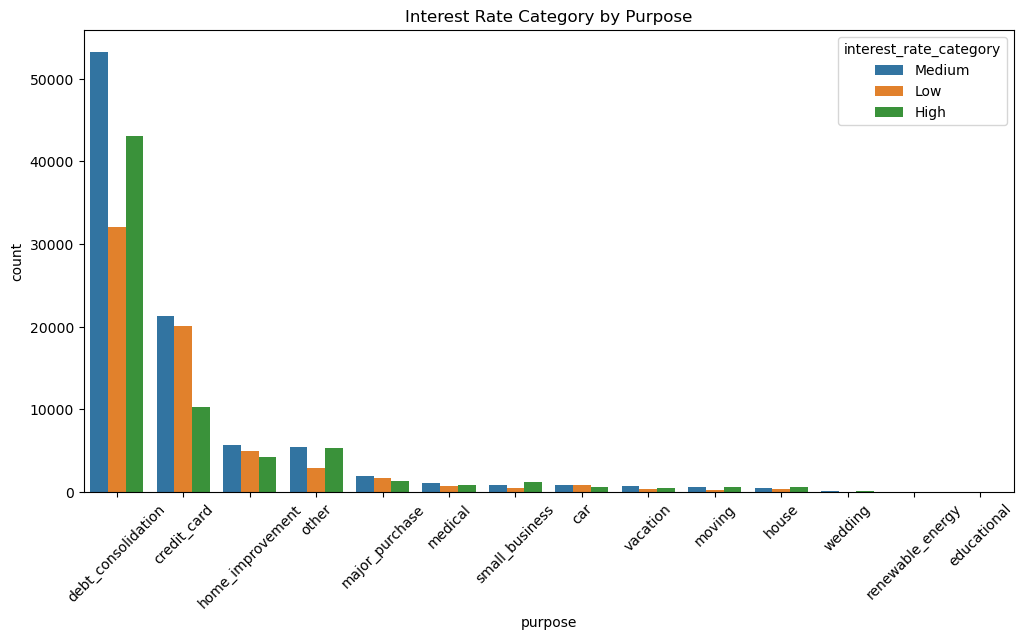

In [9]:
plt.figure(figsize=(12, 6))
sns.countplot(x='purpose', hue='interest_rate_category', data=data, order=data['purpose'].value_counts().index)
plt.title('Interest Rate Category by Purpose')
plt.xticks(rotation=45)
plt.show()


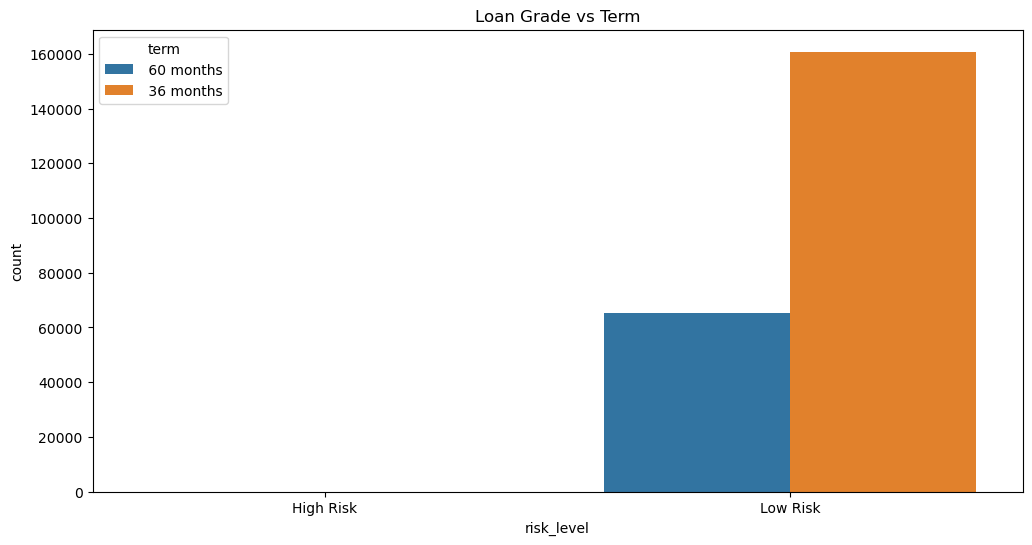

In [10]:
plt.figure(figsize=(12, 6))
sns.countplot(x='risk_level', hue='term', data=data, order=sorted(data['risk_level'].unique()))
plt.title('Loan Grade vs Term')
plt.show()


In [11]:
data.isna().sum()

id                                0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
                                 ..
purpose_grouped_other             0
purpose_grouped_small_business    0
purpose_grouped_vacation          0
risk_level                        0
loan_amnt_bins                    0
Length: 168, dtype: int64

In [12]:
# Check for infinity
print(data[numerical_cols].isin([float('inf'), float('-inf')]).any())

# Check for NaN values
print(data[numerical_cols].isnull().any())

# Check for very large values
print(data[numerical_cols].describe())


loan_amnt                False
int_rate                 False
annual_inc               False
loan_to_income           False
debt_to_income           False
payment_to_loan_ratio    False
dtype: bool
loan_amnt                False
int_rate                 False
annual_inc               False
loan_to_income           False
debt_to_income           False
payment_to_loan_ratio    False
dtype: bool
           loan_amnt       int_rate     annual_inc  loan_to_income  \
count  226070.000000  226070.000000  226070.000000   226070.000000   
mean        0.368337       0.303583       0.007074        0.000018   
std         0.232403       0.188311       0.006647        0.002975   
min         0.000000       0.000000       0.000000        0.000000   
25%         0.189873       0.162773       0.004182        0.000003   
50%         0.315190       0.284657       0.005910        0.000005   
75%         0.493671       0.415888       0.008455        0.000008   
max         1.000000       1.000000       1.

In [13]:
data[numerical_cols] = data[numerical_cols].replace([float('inf'), float('-inf')], float('nan'))
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].median())


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Define target variable and features
target = 'loan_status'  
features = ['loan_amnt', 'int_rate', 'annual_inc', 'loan_to_income']

X = data[features]
y = data[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[ 1101  1978     0     0     1  4881     9     1    28]
 [ 1230 17593     0     1     0  7408    34    29   114]
 [    0     2     0     0     0     1     0     0     0]
 [    3     5     0     0     0    14     0     0     0]
 [    2    10     0     0     0    39     0     0     0]
 [ 2539  7165     0     2     2 22440    32     9    75]
 [   21   137     0     0     0    80     1     1     2]
 [   18    94     0     0     0    48     0     0     1]
 [   40   397     0     0     0   227     0     1     5]]


C:\Users\91703\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91703\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
                                                      precision    recall  f1-score   support

                                        Charged Off       0.22      0.14      0.17      7999
                                            Current       0.64      0.67      0.65     26409
                                            Default       0.00      0.00      0.00         3
Does not meet the credit policy. Status:Charged Off       0.00      0.00      0.00        22
 Does not meet the credit policy. Status:Fully Paid       0.00      0.00      0.00        51
                                         Fully Paid       0.64      0.70      0.67     32264
                                    In Grace Period       0.01      0.00      0.01       242
                                  Late (16-30 days)       0.00      0.00      0.00       161
                                 Late (31-120 days)       0.02      0.01      0.01       670

                                           a

C:\Users\91703\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))


C:\Users\91703\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91703\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
                                                      precision    recall  f1-score   support

                                        Charged Off       0.00      0.00      0.00      7999
                                            Current       0.37      0.13      0.19     26409
                                            Default       0.00      0.00      0.00         3
Does not meet the credit policy. Status:Charged Off       0.00      0.36      0.00        22
 Does not meet the credit policy. Status:Fully Paid       0.00      0.00      0.00        51
                                         Fully Paid       0.53      0.28      0.36     32264
                                    In Grace Period       0.00      0.00      0.00       242
                                  Late (16-30 days)       0.00      0.00      0.00       161
                                 Late (31-120 days)       0.00      0.00      0.00       670

                                           a

C:\Users\91703\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(random_state=42, verbose=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))


C:\Users\91703\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91703\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
                                                      precision    recall  f1-score   support

                                        Charged Off       0.38      0.02      0.04      7999
                                            Current       0.71      0.73      0.72     26409
                                            Default       0.00      0.00      0.00         3
Does not meet the credit policy. Status:Charged Off       0.00      0.00      0.00        22
 Does not meet the credit policy. Status:Fully Paid       0.00      0.00      0.00        51
                                         Fully Paid       0.66      0.82      0.73     32264
                                    In Grace Period       0.00      0.00      0.00       242
                                  Late (16-30 days)       0.00      0.00      0.00       161
                                 Late (31-120 days)       0.00      0.00      0.00       670

                                           a

C:\Users\91703\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Encode the target variable
y_encoded = le.fit_transform(y)

# To see the mapping of labels to integers
print("Classes and their mappings:", dict(zip(le.classes_, range(len(le.classes_)))))


Classes and their mappings: {'Charged Off': 0, 'Current': 1, 'Default': 2, 'Does not meet the credit policy. Status:Charged Off': 3, 'Does not meet the credit policy. Status:Fully Paid': 4, 'Fully Paid': 5, 'In Grace Period': 6, 'Late (16-30 days)': 7, 'Late (31-120 days)': 8}


In [25]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Train XGBoost
model = XGBClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Decode predictions back to original class labels
y_pred_decoded = le.inverse_transform(y_pred)
y_test_decoded = le.inverse_transform(y_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test_decoded, y_pred_decoded))
print("Classification Report:\n", classification_report(y_test_decoded, y_pred_decoded))


Confusion Matrix:
 [[  230  1532     0     0     0  6237     0     0     0]
 [  183 17419     0     0     0  8804     2     0     1]
 [    1     0     0     0     0     2     0     0     0]
 [    0     5     0     0     0    17     0     0     0]
 [    0    11     0     0     0    40     0     0     0]
 [  223  5905     0     0     0 26136     0     0     0]
 [    7   148     0     0     0    87     0     0     0]
 [    1    90     0     0     0    70     0     0     0]
 [   15   411     0     0     0   244     0     0     0]]


C:\Users\91703\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91703\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
                                                      precision    recall  f1-score   support

                                        Charged Off       0.35      0.03      0.05      7999
                                            Current       0.68      0.66      0.67     26409
                                            Default       0.00      0.00      0.00         3
Does not meet the credit policy. Status:Charged Off       0.00      0.00      0.00        22
 Does not meet the credit policy. Status:Fully Paid       0.00      0.00      0.00        51
                                         Fully Paid       0.63      0.81      0.71     32264
                                    In Grace Period       0.00      0.00      0.00       242
                                  Late (16-30 days)       0.00      0.00      0.00       161
                                 Late (31-120 days)       0.00      0.00      0.00       670

                                           a

C:\Users\91703\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define parameter grid for XGBoost
param_grid = {
    'n_estimators': [100, 200, 300],            # Number of trees in the forest
    'max_depth': [3, 5, 7],                     # Maximum depth of trees
    'learning_rate': [0.01, 0.1, 0.2],          # Step size shrinkage
    'subsample': [0.6, 0.8, 1.0],               # Fraction of samples used per tree
    'colsample_bytree': [0.6, 0.8, 1.0],        # Fraction of features used per tree
    'gamma': [0, 1, 5]                          # Minimum loss reduction required for a split
}

# Initialize the XGBClassifier
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='f1_weighted',      # Choose a metric that suits your problem (e.g., f1_weighted for imbalanced classes)
    cv=3,                      # 3-fold cross-validation
    verbose=1,
    n_jobs=-1                  # Use all available cores
)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Best estimator
best_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred = best_model.predict(X_test)

# Decode predictions and test labels to original classes
y_pred_decoded = le.inverse_transform(y_pred)
y_test_decoded = le.inverse_transform(y_test)

# Evaluate the tuned model
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix:\n", confusion_matrix(y_test_decoded, y_pred_decoded))
print("Classification Report:\n", classification_report(y_test_decoded, y_pred_decoded))


Fitting 3 folds for each of 729 candidates, totalling 2187 fits


C:\Users\91703\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
C:\Users\91703\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
729 fits failed out of a total of 2187.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
729 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\91703\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91703\anaconda3\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwar

Best Parameters: {'colsample_bytree': 0.6, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.6}
Confusion Matrix:
 [[    0   379     0     0     0  7620     0     0     0]
 [    0  3942     0     0     0 22467     0     0     0]
 [    0     0     0     0     0     3     0     0     0]
 [    0     0     0     0     0    22     0     0     0]
 [    0     3     0     0     0    48     0     0     0]
 [    0  1264     0     0     0 31000     0     0     0]
 [    0    36     0     0     0   206     0     0     0]
 [    0    19     0     0     0   142     0     0     0]
 [    0   102     0     0     0   568     0     0     0]]


C:\Users\91703\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91703\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
                                                      precision    recall  f1-score   support

                                        Charged Off       0.00      0.00      0.00      7999
                                            Current       0.69      0.15      0.25     26409
                                            Default       0.00      0.00      0.00         3
Does not meet the credit policy. Status:Charged Off       0.00      0.00      0.00        22
 Does not meet the credit policy. Status:Fully Paid       0.00      0.00      0.00        51
                                         Fully Paid       0.50      0.96      0.66     32264
                                    In Grace Period       0.00      0.00      0.00       242
                                  Late (16-30 days)       0.00      0.00      0.00       161
                                 Late (31-120 days)       0.00      0.00      0.00       670

                                           a

C:\Users\91703\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
